In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Weighted avg

Per ogni emozione evidenzio quale feature ha avuto il punteggio massimo in un determinato modello di ML

In [15]:
print('Logistic regression')
logistic_df = pd.read_csv('logistic_regression/f1_score.csv', header=[0,1], index_col=[0,1])
logistic_df = logistic_df.drop(columns=['tilted','frontal'], level=1)
logistic_df = logistic_df.drop(index=['macro_avg', 'label_1'], level=0).reset_index(level=0, drop=True)
display(logistic_df.style.highlight_max(color='lightgreen', axis=1).format('{:.2f}'))

Logistic regression


features,delaunay,au_intensities,au_activations,au_intensities_activations
pose,none,none,none,none
emotion,,,,
anger,0.57,0.57,0.63,0.60
disgust,0.53,0.63,0.62,0.61
fear,0.74,0.63,0.62,0.67
happiness,0.59,0.65,0.68,0.65
sadness,0.55,0.56,0.62,0.57
surprise,0.57,0.60,0.58,0.62
valence,0.52,0.64,0.61,0.63


In [16]:
print('Linear SVM')
linear_df = pd.read_csv('linear_SVM/f1_score.csv', header=[0,1], index_col=[0,1])
linear_df = linear_df.drop(columns=['tilted','frontal'], level=1)
linear_df = linear_df.drop(index=['macro_avg', 'label_1'], level=0).reset_index(level=0, drop=True)
linear_df.style.highlight_max(color='lightgreen', axis=1).format('{:.2f}')

Linear SVM


features,delaunay,au_intensities,au_activations,au_intensities_activations
pose,none,none,none,none
emotion,,,,
anger,0.58,0.63,0.63,0.65
disgust,0.55,0.69,0.57,0.65
fear,0.71,0.66,0.63,0.62
happiness,0.61,0.66,0.66,0.65
sadness,0.59,0.62,0.61,0.64
surprise,0.57,0.58,0.56,0.61
valence,0.54,0.62,0.61,0.60


In [17]:
print('Kernel SVM')
kernel_df = pd.read_csv('kernel_SVM/f1_score.csv', header=[0,1], index_col=[0,1])
kernel_df = kernel_df.drop(columns=['tilted','frontal'], level=1)
kernel_df = kernel_df.drop(index=['macro_avg', 'label_1'], level=0).reset_index(level=0, drop=True)
kernel_df.style.highlight_max(color='lightgreen', axis=1).format('{:.2f}')

Kernel SVM


features,delaunay,au_intensities,au_activations,au_intensities_activations
pose,none,none,none,none
emotion,,,,
anger,0.55,0.61,0.59,0.52
disgust,0.67,0.63,0.58,0.55
fear,0.59,0.64,0.66,0.57
happiness,0.52,0.55,0.66,0.65
sadness,0.55,0.58,0.56,0.51
surprise,0.50,0.55,0.55,0.56
valence,0.48,0.52,0.63,0.51


In [18]:
print('LSTM')
lstm_df = pd.read_csv('LSTM/f1_score.csv', header=0, index_col=[0,1], names=['au_intensities', 'au_activations', 'au_intensities_activations'], skiprows=[0])
lstm_df = lstm_df.drop(index=['macro_avg', 'label_1'], level=0).reset_index(level=0, drop=True)
lstm_df.style.highlight_max(color='lightgreen', axis=1).format('{:.2f}')

LSTM


,au_intensities,au_activations,au_intensities_activations
anger,0.47,0.63,0.57
disgust,0.49,0.42,0.57
fear,0.79,0.68,0.70
happiness,0.60,0.64,0.64
sadness,0.49,0.66,0.49
surprise,0.58,0.55,0.59
valence,0.52,0.58,0.60


## Confronto con dummy classifier

Concateno la media pesata dell'f1_score di ogni modello rispetto ad ogni emozione

In [20]:
csv_list = ['logistic_regression/f1_score.csv','linear_SVM/f1_score.csv','kernel_SVM/f1_score.csv','dummy_classifier/f1_score.csv']
df_list = []

for csv in csv_list:
    df = pd.read_csv(csv, header=[0,1], index_col=[0,1])
    df_list.append(df)
    
for i, df in enumerate(df_list):
    df = df.drop(columns=['tilted','frontal'], level=1)
    df = df.drop(index=['macro_avg', 'label_1'], level=0).reset_index(level=0, drop=True)
    df_list[i] = df

df = pd.read_csv('LSTM/f1_score.csv', index_col=[0,1], skiprows=[1])
df = df.drop(index=['macro_avg', 'label_1'], level=0).reset_index(level=0, drop=True)
df_list.append(df)

df = pd.concat(df_list, axis=1, sort=False)

columns_arrays = [
    ['logistic_regression','logistic_regression','logistic_regression','logistic_regression','linear_svm','linear_svm','linear_svm','linear_svm','kernel_svm','kernel_svm','kernel_svm','kernel_svm','dummy_classifier','dummy_classifier','dummy_classifier','dummy_classifier','lstm','lstm','lstm'],
    ['delaunay','au_intensities','au_activations','au_intensities_activations','delaunay','au_intensities','au_activations','au_intensities_activations','delaunay','au_intensities','au_activations','au_intensities_activations','delaunay','au_intensities','au_activations','au_intensities_activations','au_intensities','au_activations','au_intensities_activations'],
]

columns_index = pd.MultiIndex.from_arrays(columns_arrays, names=['models', 'features'])
index = ['anger','disgust','fear','happiness','sadness','surprise','valence']

weighted_avg_df = pd.DataFrame(data=df.values, index=index, columns=columns_index)
weighted_avg_df

models    logistic_regression                                \
features             delaunay au_intensities au_activations   
anger                    0.57           0.57           0.63   
disgust                  0.53           0.63           0.62   
fear                     0.74           0.63           0.62   
happiness                0.59           0.65           0.68   
sadness                  0.55           0.56           0.62   
surprise                 0.57           0.60           0.58   
valence                  0.52           0.64           0.61   

models                               linear_svm                                \
features  au_intensities_activations   delaunay au_intensities au_activations   
anger                           0.60       0.58           0.63           0.63   
disgust                         0.61       0.55           0.69           0.57   
fear                            0.67       0.71           0.66           0.63   
happiness                       0.65       0.61           0.66           0.66   
sadness                         0.57       0.59           0.62           0.61   
surprise                        0.62       0.57           0.58           0.56   
valence                         0.63       0.54           0.62           0.61   

models                               kernel_svm                                \
features  au_intensities_activations   delaunay au_intensities au_activations   
anger                           0.65       0.55           0.61           0.59   
disgust                         0.65       0.67           0.63           0.58   
fear                            0.62       0.59           0.64           0.66   
happiness                       0.65       0.52           0.55           0.66   
sadness                         0.64       0.55           0.58           0.56   
surprise                        0.61       0.50           0.55           0.55   
valence                         0.60       0.48           0.52           0.63   

models                               dummy_classifier                 \
features  au_intensities_activations         delaunay au_intensities   
anger                           0.52             0.60           0.60   
disgust                         0.55             0.60           0.55   
fear                            0.57             0.62           0.66   
happiness                       0.65             0.53           0.50   
sadness                         0.51             0.53           0.56   
surprise                        0.56             0.53           0.53   
valence                         0.51             0.53           0.45   

models                                                        lstm  \
features  au_activations au_intensities_activations au_intensities   
anger               0.56                       0.56           0.47   
disgust             0.61                       0.55           0.49   
fear                0.63                       0.60           0.79   
happiness           0.51                       0.48           0.60   
sadness             0.58                       0.56           0.49   
surprise            0.52                       0.53           0.58   
valence             0.45                       0.50           0.52   

models                                               
features  au_activations au_intensities_activations  
anger               0.63                       0.57  
disgust             0.42                       0.57  
fear                0.68                       0.70  
happiness           0.64                       0.64  
sadness             0.66                       0.49  
surprise            0.55                       0.59  
valence             0.58                       0.60

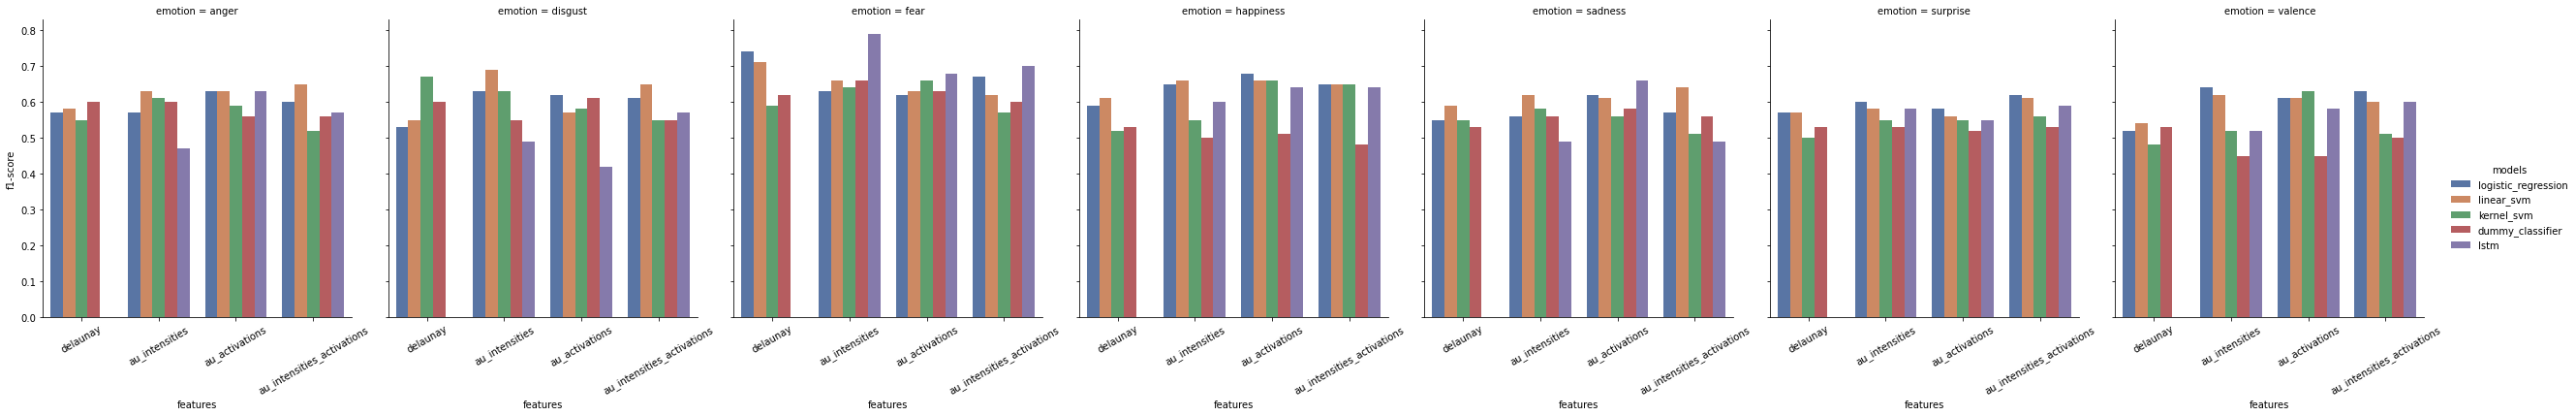

In [21]:
df = weighted_avg_df.reset_index().rename(columns={'index':'emotion'})
df = df.melt(id_vars=['emotion'], value_name='f1-score')
fg = sns.catplot(x='features', y='f1-score', hue='models', col='emotion', kind='bar', palette='deep', data=df)
fg.set_xticklabels(rotation=30)
plt.show()

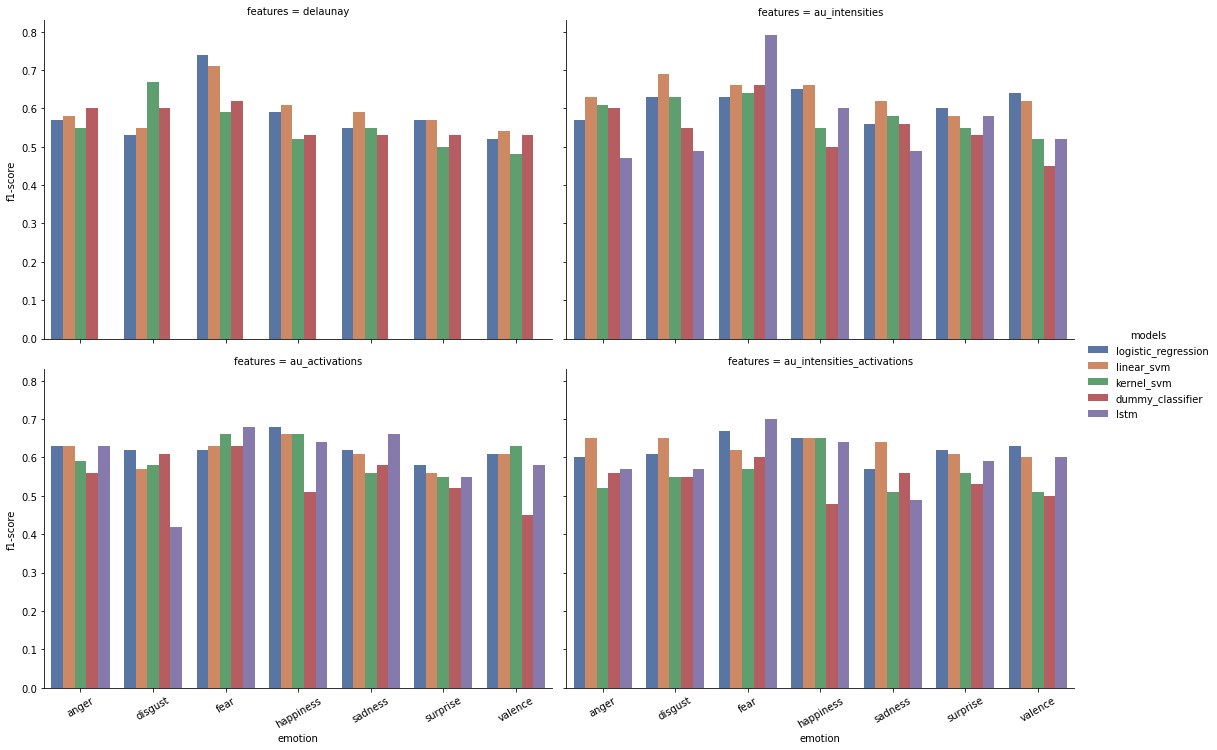

In [22]:
fg = sns.catplot(x='emotion', y='f1-score', hue='models', col='features', kind='bar', palette='deep', col_wrap=2, data=df, aspect=1.5)
fg.set_xticklabels(rotation=30)
plt.show()

## Confronto con il paper

### Weighted avg

In [26]:
columns = ['anger','disgust','fear','happiness','sadness','surprise','valence']
data = np.array([[0.60, 0.60, 0.71, 0.69, 0.54, 0.57, 0.62]])
paper_df = pd.DataFrame(data=data, columns=columns, index=['baseline'])
paper_df

,anger,disgust,fear,happiness,sadness,surprise,valence
baseline,0.6,0.6,0.71,0.69,0.54,0.57,0.62


,logistic_regression,linear_svm,kernel_svm,baseline,lstm
anger,0.63,0.63,0.59,0.60,0.57
disgust,0.62,0.69,0.58,0.60,0.57
fear,0.62,0.66,0.66,0.71,0.70
happiness,0.68,0.66,0.66,0.69,0.64
sadness,0.62,0.62,0.56,0.54,0.49
surprise,0.58,0.58,0.55,0.57,0.59
valence,0.61,0.62,0.63,0.62,0.60


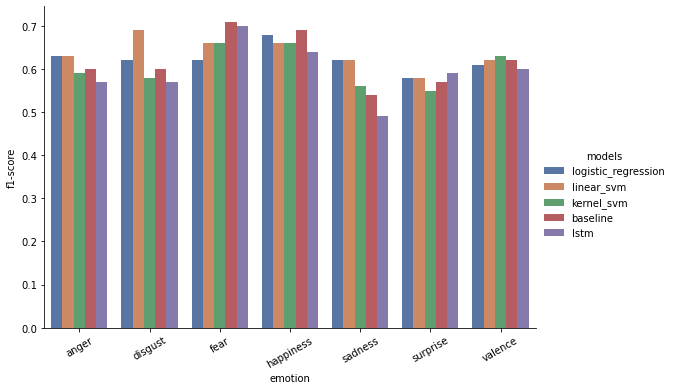

In [40]:
best_features_df = weighted_avg_df.loc[:,[('logistic_regression','au_activations'),('linear_svm', 'au_intensities'),('kernel_svm','au_activations'),('lstm','au_intensities_activations')]]
all_models_df = pd.concat([best_features_df.droplevel(1, axis=1).iloc[:,:3], paper_df.T,best_features_df.droplevel(1, axis=1).iloc[:,3]], axis=1)
display(all_models_df.style.highlight_max(color='lightgreen', axis=1).format('{:.2f}'))

melted_df = all_models_df.reset_index().rename(columns={'index':'emotion'}).melt(id_vars='emotion', var_name='models', value_name='f1-score')
fg = sns.catplot(x='emotion', y='f1-score', hue='models', kind='bar', palette='deep', data=melted_df, aspect=1.5)
fg.set_xticklabels(rotation=30)
plt.show()

# Medioni

## Confronto con dummy classifier

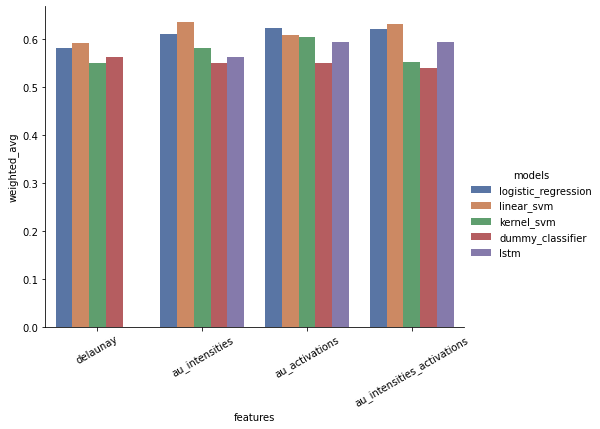

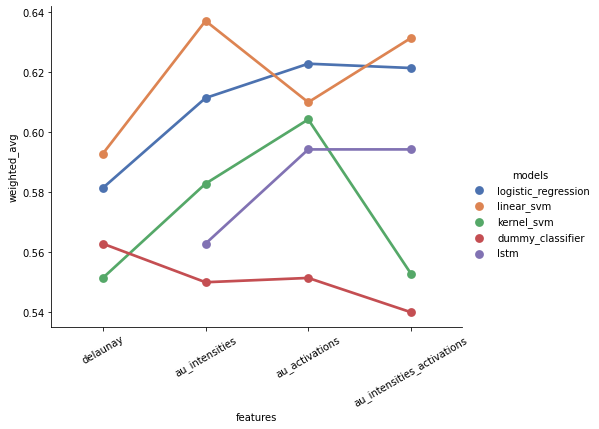

In [45]:
df = weighted_avg_df.mean(axis=0).reset_index().rename(columns={0:'weighted_avg'})

fg = sns.catplot(x='features', y='weighted_avg', hue='models', kind='bar', palette='deep', data=df, aspect=1.3)
fg.set_xticklabels(rotation=30)
plt.show()

fg = sns.catplot(x='features', y='weighted_avg', hue='models', kind='point', palette='deep', data=df, aspect=1.3)
fg.set_xticklabels(rotation=30)
plt.show()

### Meglio

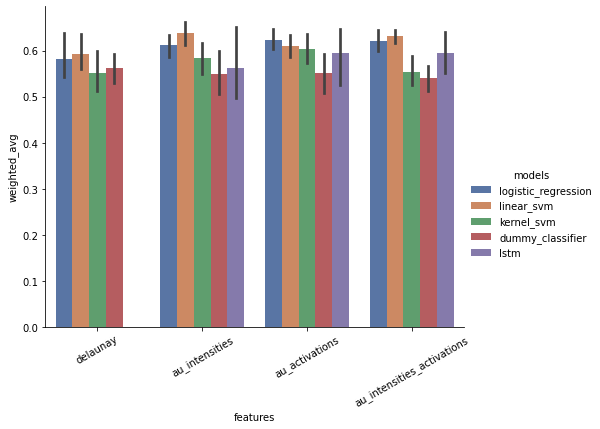

In [65]:
df = weighted_avg_df.reset_index().rename(columns={'index':'emotions'})
df = df.melt(id_vars='emotions').rename(columns={'value':'weighted_avg'})
fg = sns.catplot(x='features', y='weighted_avg', hue='models', kind='bar', palette='deep', data=df, aspect=1.3)
fg.set_xticklabels(rotation=30)
plt.show()

#fg = sns.catplot(x='features', y='weighted_avg', hue='models', kind='point', palette='deep', data=df, aspect=1.3)
#fg.set_xticklabels(rotation=30)
#plt.show()

## Confronto con il paper

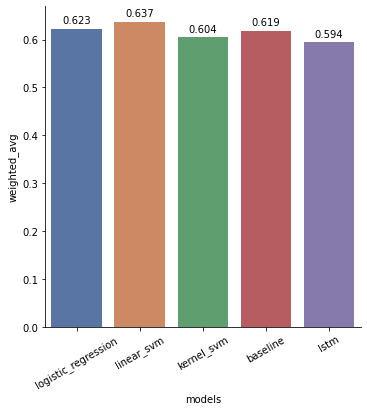

In [42]:
best_features_df = weighted_avg_df.loc[:,[('logistic_regression','au_activations'),('linear_svm', 'au_intensities'),('kernel_svm','au_activations'),('lstm','au_intensities_activations')]]
all_models_df = pd.concat([best_features_df.droplevel(1, axis=1).iloc[:,:3], paper_df.T, best_features_df.droplevel(1, axis=1).iloc[:,3]], axis=1)

melted_df = all_models_df.mean().reset_index().rename(columns={'index':'models', 0:'weighted_avg'})
fg = sns.catplot(x='models', y='weighted_avg', kind='bar', palette='deep', data=melted_df)
fg.set_xticklabels(rotation=30)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = fg.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [round(melted_df.weighted_avg, 3).values[i] for i,v in enumerate(c)]
    ax.bar_label(c, labels=labels, label_type='edge', padding=3)
    
plt.show()